In [2]:
import time
import re
import math
import itertools
import requests
from collections import defaultdict
from typing import Callable, Any

import numpy as np
import pandas as pd

from Bio import SeqIO
from Bio.Data import CodonTable
from Bio.Seq import Seq
from Bio.SeqUtils import gc_fraction

# Bioinformatics Stronghold

In [7]:
def count_gc_content(filename: str) -> tuple[str]:
  with open(filename) as f:
    gc = {}
    current = None
    # get records
    for line in f.readlines():
      if line.startswith('>'):
        current = line[1:].rstrip()
        gc[current] = ''
      else:
        gc[current] += line.rstrip()
    # count percents
    for k,v in gc.items():
      gc[k] = (v.count('C')+v.count('G'))/len(v)*100
    id = max(gc, key=gc.get)
    return (id, f'{gc[id]:.6f}')

# def count_gc_content(filename: str) -> tuple[str]:
#   with open(filename) as f:
#     s = f.read()
#   genes = s.split(">")[1:]
#   gc = []
#   for gene in genes:
#     a = gene.count("C") + gene.count("G")
#     b = gene.count("C") + gene.count("G") + gene.count("A") + gene.count("T")
#     gc.append(float(a)*100/b)
#   return (genes[gc.index(max(gc))][:13], f'{max(gc):.6f}')

# def count_gc_content(filename: str) -> tuple:
#   gc = {}
#   for record in SeqIO.parse(filename, 'fasta'):
#     gc[record.id] = gc_fraction(record.seq)
#   id = max(gc, key=gc.get)
#   return (id, f'{gc[id]*100:.6f}')



test_input = """>Rosalind_6404
CCTGCGGAAGATCGGCACTAGAATAGCCAGAACCGTTTCTCTGAGGCTTCCGGCCTTCCC
TCCCACTAATAATTCTGAGG
>Rosalind_5959
CCATCGGTAGCGCATCCTTAGTCCAATTAAGTCCCTATCCAGGCGCTCCGCCGAAGGTCT
ATATCCATTTGTCAGCAGACACGC
>Rosalind_0808
CCACCCTCGTGGTATGGCTAGGCATTCAGGAACCGGAGAACGCTTCAGACCAGCCCGGAC
TGGGAACCTGCGGGCAGTAGGTGGAAT
"""
test_output = ('Rosalind_0808', '60.919540')

test_solution(count_gc_content, test_input, test_output)

Test passed!


## Rabbits and Recurrence Relations

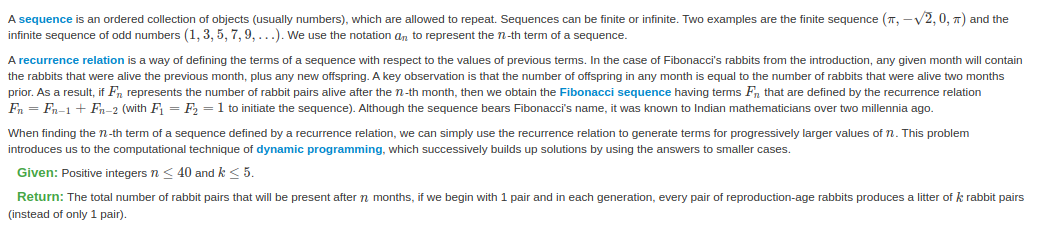

In [8]:
def fib(n: int, k: int = 1) -> int:
  a = 1
  b = 1
  print(f'Month 1: {a} pair')
  print(f'Month 2: {b} pair')
  for i in range(3, n+1):
    a, b = b, a*k+b
    print(f'Month {i}: {b} pairs')
  return b


def find_fib_number(filename: str) -> int:
  with open(filename) as f:
    n, k = f.readline().strip().split(' ')
    n, k = int(n), int(k)
  if n > 40 or k > 5:
    raise Exception("Incorrect input. The input constraints are: n should be ≤ 40, k should be ≤ 5.")
  return fib(n, k)

test_solution(find_fib_number, '5 3', 19)

Month 1: 1 pair
Month 2: 1 pair
Month 3: 4 pairs
Month 4: 7 pairs
Month 5: 19 pairs
Test passed!


## Mortal Fibonacci Rabits

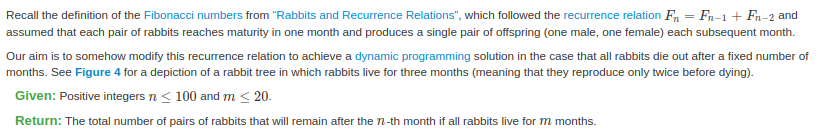

In [9]:
def mortal_fib(n: int, m: int) -> int:
  seq = [(1, 0), (0, 1)]    # (newborn, mature)
  for i in range(2, n):
    newborn = seq[i-1][1]
    dead = seq[i-m][0] if len(seq) >= m else 0
    mature = sum(seq[i-1]) - dead
    seq.append((newborn, mature))
    print(f'Month {i+1}: {sum(seq[i])} pairs')
  return sum(seq[-1])

def find_mortal_fib_number(filename: str) -> int:
  with open(filename) as f:
    n, m = f.readline().strip().split(' ')
    n, m = int(n), int(m)
  return mortal_fib(n, m)

test_solution(find_mortal_fib_number, '6 3', 4)

Month 3: 2 pairs
Month 4: 2 pairs
Month 5: 3 pairs
Month 6: 4 pairs
Test passed!


## Counting Point Mutations

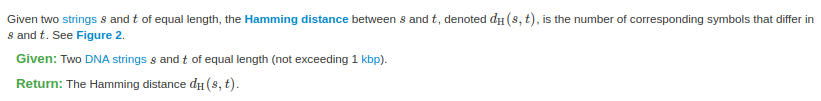

In [10]:
def count_point_mutations(filename: str) -> int:
  with open(filename) as f:
    s1 = f.readline().strip()
    s2 = f.readline().strip()
    assert len(s1) == len(s2)
  return sum(ch1 != ch2 for ch1, ch2 in zip(s1, s2))

# def count_point_mutations(filename: str) -> int:
#   with open(filename) as f:
#     s1 = f.readline().strip()
#     s2 = f.readline().strip()
#     assert len(s1) == len(s2)
#   count = 0
#   for i in range(len(s1)):
#     if s1[i] != s2[i]:
#       count += 1
#   return count

test_input = """GAGCCTACTAACGGGAT
CATCGTAATGACGGCCT
"""
test_output = 7

test_solution(count_point_mutations, test_input, test_output)

Test passed!


## Mendel's First Law

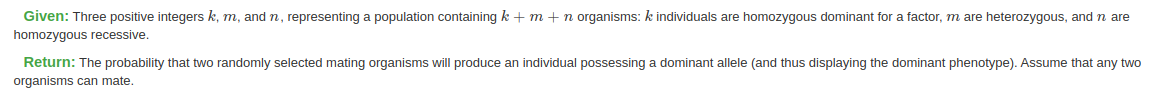

In [11]:
# def dominant_allele_probability(filename: str) -> float:
#   # TODO
#   with open(filename) as f:
#     AA, Aa, aa = (int(i) for i in f.read().strip().split())
#   total = AA+Aa+aa
#   d = total*(total-1)

#   p_2HomoRecessive = aa*(aa-1)/d
#   p_2Hetero = Aa*(Aa-1)/d
#   p_1HomoRecessive_1Hetero = aa*Aa/d

#   p_homo_recessive_offspring = p_2HomoRecessive*1 + p_2Hetero*0.25 + p_1HomoRecessive_1Hetero*0.5
#   p = 1 - p_homo_recessive_offspring
#   return round(p, 5)

def dominant_allele_probability(filename: str) -> float:
  with open(filename) as f:
    AA, Aa, aa = (int(i) for i in f.read().strip().split())
  total = AA+Aa+aa
  total_pairs = total*(total-1)/2

  # favorable pairs
  AA_AA = math.comb(AA, 2) if AA >= 2 else 0
  AA_Aa = AA*Aa
  AA_aa = AA*aa
  Aa_Aa = (math.comb(Aa, 2) if Aa >= 2 else 0)*0.75
  Aa_aa = Aa*aa*0.5
  favorable_pairs = AA_AA + AA_Aa + AA_aa + Aa_Aa + Aa_aa

  return round(favorable_pairs/total_pairs, 5)

test_input = '2 2 2'
test_output = 0.78333
test_solution(dominant_allele_probability, test_input, test_output)

Test passed!


## Translating RNA into Protein

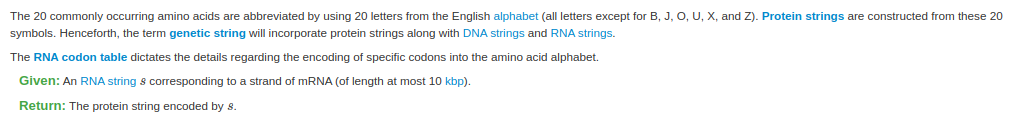

In [12]:
rna_to_protein = CodonTable.standard_rna_table.forward_table
print(rna_to_protein)

{'UUU': 'F', 'UUC': 'F', 'UUA': 'L', 'UUG': 'L', 'UCU': 'S', 'UCC': 'S', 'UCA': 'S', 'UCG': 'S', 'UAU': 'Y', 'UAC': 'Y', 'UGU': 'C', 'UGC': 'C', 'UGG': 'W', 'CUU': 'L', 'CUC': 'L', 'CUA': 'L', 'CUG': 'L', 'CCU': 'P', 'CCC': 'P', 'CCA': 'P', 'CCG': 'P', 'CAU': 'H', 'CAC': 'H', 'CAA': 'Q', 'CAG': 'Q', 'CGU': 'R', 'CGC': 'R', 'CGA': 'R', 'CGG': 'R', 'AUU': 'I', 'AUC': 'I', 'AUA': 'I', 'AUG': 'M', 'ACU': 'T', 'ACC': 'T', 'ACA': 'T', 'ACG': 'T', 'AAU': 'N', 'AAC': 'N', 'AAA': 'K', 'AAG': 'K', 'AGU': 'S', 'AGC': 'S', 'AGA': 'R', 'AGG': 'R', 'GUU': 'V', 'GUC': 'V', 'GUA': 'V', 'GUG': 'V', 'GCU': 'A', 'GCC': 'A', 'GCA': 'A', 'GCG': 'A', 'GAU': 'D', 'GAC': 'D', 'GAA': 'E', 'GAG': 'E', 'GGU': 'G', 'GGC': 'G', 'GGA': 'G', 'GGG': 'G'}


In [13]:
# def translate_rna(filename: str) -> str:
#   with open(filename) as f:
#     s = f.read().strip()
#   start = s.find('AUG')
#   protein_seq = []
#   for i in range(start, len(s), 3):
#     codon = s[i:i+3]
#     if codon in ['UAA', 'UAG', 'UGA']:
#       break
#     protein_seq.append(codon_table[codon])
#   return ''.join(protein_seq)

def translate_rna(filename: str) -> str:
  with open(filename) as f:
    s = f.read().strip()
  rna_seq = Seq(s)
  protein_seq = rna_seq.translate(to_stop=True)
  return protein_seq

test_input = "AUGGCCAUGGCGCCCAGAACUGAGAUCAAUAGUACCCGUAUUAACGGGUGA"
test_output = "MAMAPRTEINSTRING"
test_solution(translate_rna, test_input, test_output)

Test passed!


## Finding a Motif in DNA

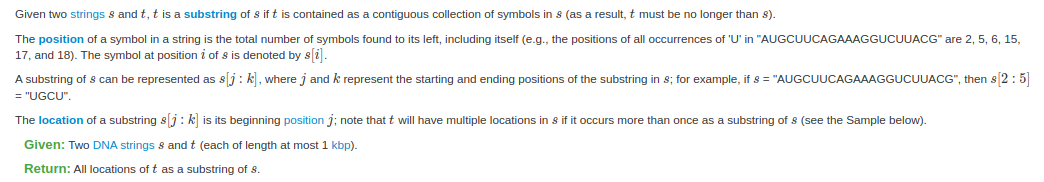

In [14]:
def naiveSearch(txt: str, pat: str) -> list[int]:
  # O(n*m)
  matches = []
  for i in range(len(txt)-len(pat)+1):
    j = 0
    while j < len(pat) and txt[i+j] == pat[j]:
      j += 1
    if j == len(pat):
      matches.append(i)
  return matches

def find_dna_motif(filename: str) -> list[int]:
  with open(filename) as f:
    s = f.readline().rstrip()
    m = f.readline().rstrip()
  matches = []
  i = s.find(m)
  while i != -1:
    matches.append(i+1)
    i = s.find(m, i+1)
  return matches

def find_dna_motif_re(filename: str) -> list[int]:
  with open(filename) as f:
    s = f.readline().rstrip()
    m = f.readline().rstrip()
  return [i.start()+1 for i in re.finditer(f"(?={m})", s)]

# def find_dna_motif_naive_1(filename: str) -> list[int]:
#   with open(filename) as f:
#     s = f.readline().rstrip()
#     m = f.readline().rstrip()
#   return [i+1 for i in naiveSearch(s, m)]

# def find_dna_motif_naive_2(filename: str) -> list[int]:
#   with open(filename) as f:
#     s = f.readline().rstrip()
#     m = f.readline().rstrip()
#   matches = []
#   for i in range(len(s)):
#     if s[i:].startswith(m):
#       matches.append(i+1)
#   return matches

test_input = """GATATATGCATATACTT
ATAT"""
test_output = [2, 4, 10]
test_solution(find_dna_motif, test_input, test_output)
test_solution(find_dna_motif_re, test_input, test_output)

Test passed!
Test passed!


Average execution time of *find_dna_motif* over 1000 calls: 2.8e-05 seconds  
Average execution time of *find_dna_motif_re* over 1000 calls: 4.5e-05 seconds  
Average execution time of *find_dna_motif_naive_1* over 1000 calls: 0.000359 seconds  
Average execution time of *find_dna_motif_naive_2* over 1000 calls: 0.0002 seconds

## Consensus and Profile

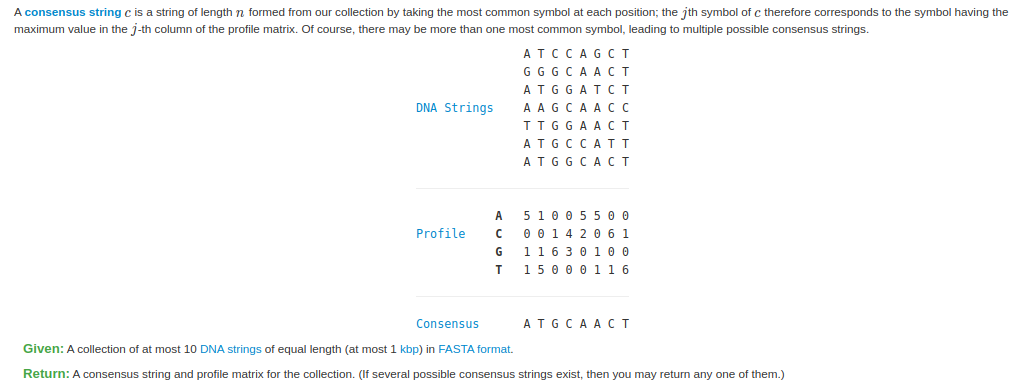

In [15]:
def consensus_and_profile(filename: str) -> str:
  records = SeqIO.parse(filename, 'fasta')

  # create profile
  profile = None
  for record in records:
    sequence = record.seq
    if not profile:
       sequence_length = len(sequence)
       profile = defaultdict(lambda: np.zeros(sequence_length, dtype=int))
    if len(sequence) != sequence_length:
       raise Exception('All sequences should have the same length')
    for i in range(len(sequence)):
       profile[sequence[i]][i] += 1
  profile = pd.DataFrame.from_dict(profile)

   # create consensus string
  consensus = ''.join([b for b in profile.idxmax(axis=1)])

  return f"""{consensus}
A: {' '.join(profile['A'].astype(str))}
C: {' '.join(profile['C'].astype(str))}
G: {' '.join(profile['G'].astype(str))}
T: {' '.join(profile['T'].astype(str))}"""

# def consensus_and_profile_1(filename: str) -> str:
#   records = SeqIO.parse(filename, 'fasta')

#   # create profile
#   profile = None
#   for record in records:
#     sequence = record.seq
#     if not isinstance(profile, pd.DataFrame):
#        sequence_length = len(sequence)
#        profile = pd.DataFrame(0, index=np.arange(sequence_length), columns=list('ACGT'))
#     if len(sequence) != sequence_length:
#        raise Exception('All sequences should have the same length')
#     for i in range(len(sequence)):
#        profile.loc[i, sequence[i]] += 1
#   # profile = pd.DataFrame.from_dict(profile)

#    # create consensus string
#   consensus = ''.join([b for b in profile.idxmax(axis=1)])

#   return f"""{consensus}
# A: {' '.join(profile['A'].astype(str))}
# C: {' '.join(profile['C'].astype(str))}
# G: {' '.join(profile['G'].astype(str))}
# T: {' '.join(profile['T'].astype(str))}"""

test_input = """>Rosalind_1
ATCCAGCT
>Rosalind_2
GGGCAACT
>Rosalind_3
ATGGATCT
>Rosalind_4
AAGCAACC
>Rosalind_5
TTGGAACT
>Rosalind_6
ATGCCATT
>Rosalind_7
ATGGCACT"""
test_output = """ATGCAACT
A: 5 1 0 0 5 5 0 0
C: 0 0 1 4 2 0 6 1
G: 1 1 6 3 0 1 0 0
T: 1 5 0 0 0 1 1 6"""

test_solution(consensus_and_profile, test_input, test_output)

Test passed!


Average execution time of *consensus_and_profile* over 10 calls: 0.02947 seconds  

Average execution time of *consensus_and_profile_1* over 10 calls: 1.372286 seconds

## Calculating Expected Offspring

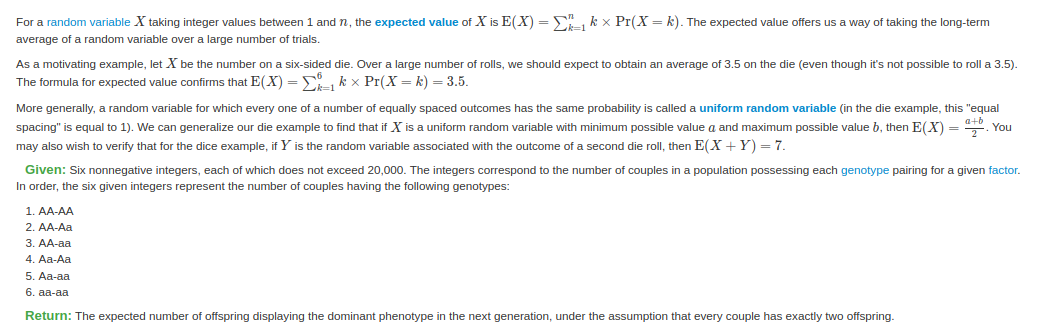

In [16]:
def expected_dominant_offsprings(filename: str) -> float:
    num_offsprings = 2
    with open(filename) as f:
        n_pairs = [int(i) for i in f.readline().split()]
    # pairs = ['AA-AA', 'AA-Aa', 'AA-aa', 'Aa-Aa', 'Aa-aa', 'aa-aa']
    probabilities = [1, 1, 1, 0.75, 0.5, 0]
    expected_dominant = 0
    for n, prob in zip(n_pairs, probabilities):
        expected_dominant += n*prob*num_offsprings
    return expected_dominant

test_solution(expected_dominant_offsprings, '1 0 0 1 0 1', 3.5)

Test passed!


## Inferring mRNA from Protein

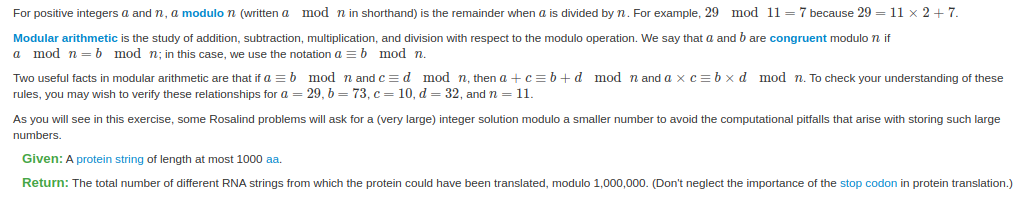

In [17]:
protein_to_mRNA_codons = {
    "A": ["GCU", "GCC", "GCA", "GCG"],
    "C": ["UGU", "UGC"],
    "D": ["GAU", "GAC"],
    "E": ["GAA", "GAG"],
    "F": ["UUU", "UUC"],
    "G": ["GGU", "GGC", "GGA", "GGG"],
    "H": ["CAU", "CAC"],
    "I": ["AUU", "AUC", "AUA"],
    "K": ["AAA", "AAG"],
    "L": ["UUA", "UUG", "CUU", "CUC", "CUA", "CUG"],
    "M": ["AUG"],
    "N": ["AAU", "AAC"],
    "P": ["CCU", "CCC", "CCA", "CCG"],
    "Q": ["CAA", "CAG"],
    "R": ["CGU", "CGC", "CGA", "CGG", "AGA", "AGG"],
    "S": ["UCU", "UCC", "UCA", "UCG", "AGU", "AGC"],
    "T": ["ACU", "ACC", "ACA", "ACG"],
    "V": ["GUU", "GUC", "GUA", "GUG"],
    "W": ["UGG"],
    "Y": ["UAU", "UAC"],
    "*": ["UAA", "UAG", "UGA"],
}

In [18]:
def protein_to_mRNA_num(filename: str) -> int:
    with open(filename) as f:
        protein = f.readline().strip()
    n = 1
    for aa in protein:
        n *= len(protein_to_mRNA_codons[aa])
    n *= 3 # stop codons
    return n % 1000000

test_solution(protein_to_mRNA_num, 'MA', 12)

Test passed!


## Independent Alleles

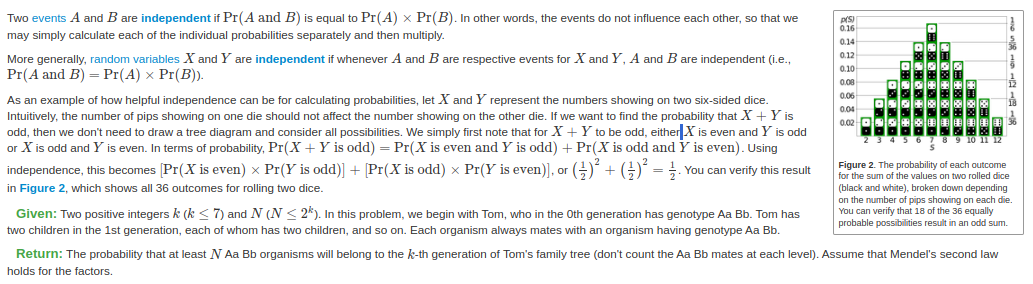

In [19]:
def prob_n_AaBb(filename: str) -> float:
    # AaBb + AaBb, 2 offsprings
    with open(filename) as f:
        generations, at_least = [int(i) for i in f.readline().split()]
    prob_AaBb = 0.25
    total_offsprings = 2**generations
    probs = []
    for k in range(at_least, total_offsprings+1):
        # probability of exactly k AaBb offsprings
        nCk = math.comb(total_offsprings, k)
        prob_k = nCk * (prob_AaBb**k) * ((1-prob_AaBb)**(total_offsprings-k))
        probs.append(prob_k)
    return round(sum(probs), 3)
    

test_solution(prob_n_AaBb, '2 1', 0.684)

Test passed!


## Calculating Protein Mass

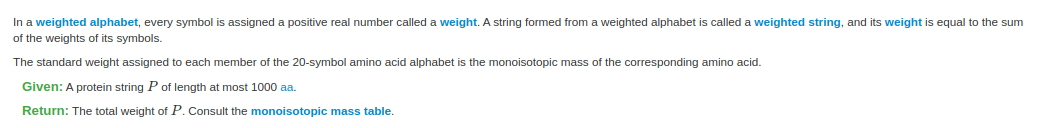

In [20]:
monoisotopic_mass_table = {
    'A': 71.03711,
    'C': 103.00919,
    'D': 115.02694,
    'E': 129.04259,
    'F': 147.06841,
    'G': 57.02146,
    'H': 137.05891,
    'I': 113.08406,
    'K': 128.09496,
    'L': 113.08406,
    'M': 131.04049,
    'N': 114.04293,
    'P': 97.05276,
    'Q': 128.05858,
    'R': 156.10111,
    'S': 87.03203,
    'T': 101.04768,
    'V': 99.06841,
    'W': 186.07931,
    'Y': 163.06333,
}

In [21]:
def calculate_protein_mass(filename: str) -> float:
    with open(filename) as f:
        seq = f.readline().strip()
    return round(sum(monoisotopic_mass_table[i] for i in seq), 3)
    

test_solution(calculate_protein_mass, 'SKADYEK', 821.392)

Test passed!


## Overlap graphs

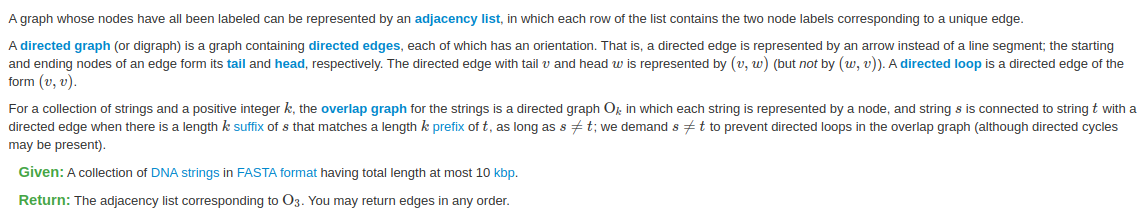

In [22]:
def overlap_graph(filename: str) -> str:
    # parse file
    pattern = re.compile(r'>(?P<label>Rosalind_\d{4})\s*(?P<bases>[ACGT\s]+)')
    with open(filename) as f:
        records = pattern.findall(f.read().replace("\n",""))
    # create adjacency list 
    k = 3
    pairs = []
    prefixes = defaultdict(list)
    for id, seq in records:
        prefixes[seq[:k]].append(id)
    for id1, seq1 in records:
        suffix = seq1[-k:]
        for id2 in prefixes[suffix]:
            if id2 != id1:
                pairs.append((id1, id2))
    # format result
    result = ""
    for pair in pairs:
        result += f'{pair[0]} {pair[1]}\n'
    return result   

# def overlap_graph(filename: str) -> str:
#     # parse file
#     pattern = re.compile(r'>(?P<label>Rosalind_\d{4})\s*(?P<bases>[ACGT\s]+)')
#     with open(filename) as f:
#         records = dict(pattern.findall(f.read().replace("\n","")))   
#     # create adjacency list 
#     k = 3
#     pairs = []
#     for id1 in records.keys():
#         for id2 in records.keys():
#             if (id1 != id2) and (records[id2].startswith(records[id1][-k:])):
#                 pairs.append((id1, id2))
#     # format result
#     result = ""
#     for pair in pairs:
#         result += f'{pair[0]} {pair[1]}\n'
#     return result

test_input = """>Rosalind_0498
AAATAAA
>Rosalind_2391
AAATTTT
>Rosalind_2323
TTTTCCC
>Rosalind_0442
AAATCCC
>Rosalind_5013
GGGTGGG"""

test_output = """Rosalind_0498 Rosalind_2391
Rosalind_0498 Rosalind_0442
Rosalind_2391 Rosalind_2323
"""

test_solution(overlap_graph, test_input, test_output)

Test passed!


## Finding a Protein Motif

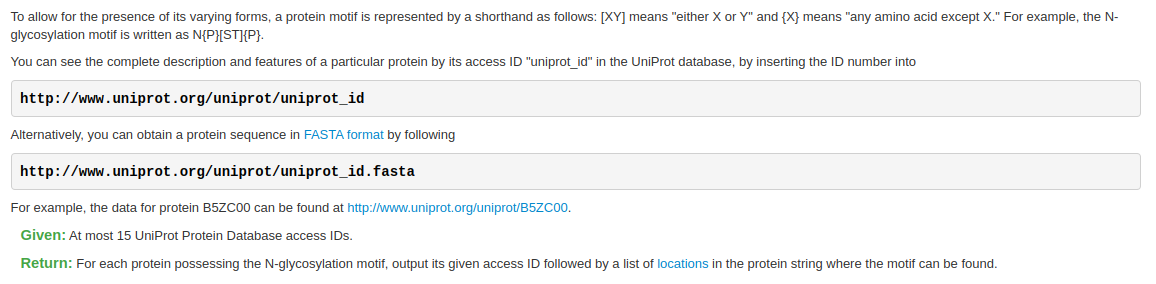

In [23]:
def find_glycosylation_motif(s: str) -> list:
    m = r"N[^P][ST][^P]"
    return  [i.start()+1 for i in re.finditer(f"(?={m})", s)]
    

def find_protein_motif(filename: str) -> str:

    # parse data
    with open(filename) as f:
        ids = [id.strip() for id in f if id]

    # find motifs
    motifs = {}
    for id in ids:
        r = requests.get(f'https://rest.uniprot.org/uniprot/{id[:6]}.fasta')
        protein = "".join(line.strip() for line in r.iter_lines(decode_unicode=True) if not line.startswith(">"))
        # protein = ''.join(r.text.splitlines()[1:])
        matches = find_glycosylation_motif(protein)
        if matches:
            motifs[id] = ' '.join(map(str, matches))

    # format result
    result = ""
    for k, v in motifs.items():
        result += f'{k}\n{v}\n'
    return result     

test_input = """A2Z669
B5ZC00
P07204_TRBM_HUMAN
P20840_SAG1_YEAST"""

test_output = """B5ZC00
85 118 142 306 395
P07204_TRBM_HUMAN
47 115 116 382 409
P20840_SAG1_YEAST
79 109 135 248 306 348 364 402 485 501 614
"""

test_solution(find_protein_motif, test_input, test_output)

Test passed!


## Open Reading Frames

An open reading frame (ORF) is a DNA or RNA substring that could be translated into a protein string. It begins with a start codon and ends with a stop codon, with no stop codons appearing in between.  
  


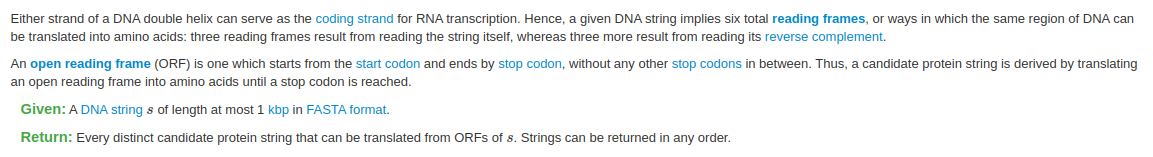

In [24]:
dna_to_protein = CodonTable.standard_dna_table.forward_table
print(dna_to_protein)

{'TTT': 'F', 'TTC': 'F', 'TTA': 'L', 'TTG': 'L', 'TCT': 'S', 'TCC': 'S', 'TCA': 'S', 'TCG': 'S', 'TAT': 'Y', 'TAC': 'Y', 'TGT': 'C', 'TGC': 'C', 'TGG': 'W', 'CTT': 'L', 'CTC': 'L', 'CTA': 'L', 'CTG': 'L', 'CCT': 'P', 'CCC': 'P', 'CCA': 'P', 'CCG': 'P', 'CAT': 'H', 'CAC': 'H', 'CAA': 'Q', 'CAG': 'Q', 'CGT': 'R', 'CGC': 'R', 'CGA': 'R', 'CGG': 'R', 'ATT': 'I', 'ATC': 'I', 'ATA': 'I', 'ATG': 'M', 'ACT': 'T', 'ACC': 'T', 'ACA': 'T', 'ACG': 'T', 'AAT': 'N', 'AAC': 'N', 'AAA': 'K', 'AAG': 'K', 'AGT': 'S', 'AGC': 'S', 'AGA': 'R', 'AGG': 'R', 'GTT': 'V', 'GTC': 'V', 'GTA': 'V', 'GTG': 'V', 'GCT': 'A', 'GCC': 'A', 'GCA': 'A', 'GCG': 'A', 'GAT': 'D', 'GAC': 'D', 'GAA': 'E', 'GAG': 'E', 'GGT': 'G', 'GGC': 'G', 'GGA': 'G', 'GGG': 'G'}


In [25]:
def find_orfs(dna: str) -> list[str]:
    orfs = []
    start = dna.find('ATG')
    # for each start codon find corresponding stop codon
    while start != -1:
        stop = next((i for i in range(start, len(dna) - 2, 3) if dna[i:i+3] in ["TAA", "TAG", "TGA"]), -1)
        if stop != -1:
            orfs.append(dna[start:stop+2]) # omit last letter of stop codon
        start = dna.find('ATG', start+1)
    return orfs

def orf_solution(filename: str) -> set[str]:
    # # regex does not find overlapping sequences !!!
    # pattern = r"ATG(?:[ATGC]{3})*?(?:TAA|TAG|TGA)"
    with open(filename) as f:
        next(f)
        dna = f.read().replace('\n', '')
    reverse_complement = dna[::-1].translate(str.maketrans('ACGT', 'TGCA'))

    orfs = find_orfs(dna) + find_orfs(reverse_complement)
    aa_seqs = []
    for orf in orfs:
        aa_seq = [dna_to_protein.get(orf[j:j+3]) for j in range(0, len(orf), 3) if dna_to_protein.get(orf[j:j+3])]
        aa_seqs.append(''.join(aa_seq))
    return set(aa_seqs)

def print_orf_solution(filename: str) -> None:
    for seq in orf_solution(filename):
        print(seq)

test_input = """>Rosalind_99
AGCCATGTAGCTAACTCAGGTTACATGGGGATGACCCCGCGACTTGGATTAGAGTCTCTTTTGGAATAAGCCTGAATGATCCGAGTAGCATCTCAG"""

test_output = {"MLLGSFRLIPKETLIQVAGSSPCNLS", "M", "MGMTPRLGLESLLE", "MTPRLGLESLLE"}

test_solution(orf_solution, test_input, test_output)

Test passed!


## RNA Splicing

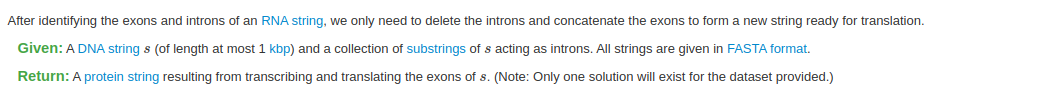

In [26]:
def rna_splicing(filename: str) -> str:
    # parse file
    pattern = re.compile(r'>Rosalind_\d+\s*([ACGT\s]+)')
    with open(filename) as f:
        records = pattern.findall(f.read().replace("\n",""))
        dna = records[0]
        introns = records[1:]
        
    # splice
    for intron in introns:
        dna = dna.replace(intron, '')
        # dna = ''.join(dna.split(intron))
    
    # translate
    start = dna.find('ATG')
    stop = next((i for i in range(start, len(dna) - 2, 3) if dna[i:i+3] in ["TAA", "TAG", "TGA"]), -1)
    coding_seq = dna[start:stop]
    aa_seq = ''.join([dna_to_protein[dna[i:i+3]] for i in range(0, len(coding_seq), 3)])
    return aa_seq
    
test_input = """>Rosalind_10
ATGGTCTACATAGCTGACAAACAGCACGTAGCAATCGGTCGAATCTCGAGAGGCATATGGTCACATGATCGGTCGAGCGTGTTTCAAAGTTTGCGCCTAG
>Rosalind_12
ATCGGTCGAA
>Rosalind_15
ATCGGTCGAGCGTGT"""

test_output = "MVYIADKQHVASREAYGHMFKVCA"

test_solution(rna_splicing, test_input, test_output)

Test passed!


## Finding a Shared Motif

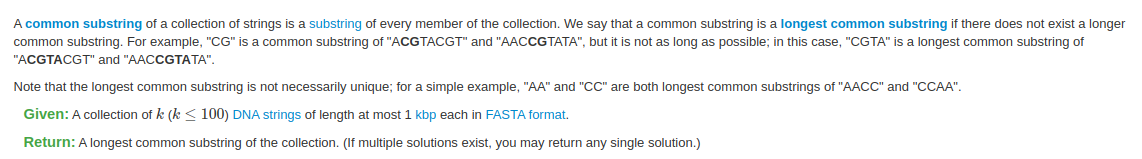

In [27]:
def find_shared_motif_naive(filename: str) -> str:
    # parse file
    pattern = re.compile(r'>Rosalind_\d+\s*([ACGT\s]+)')
    with open(filename) as f:
        seqs = pattern.findall(f.read().replace("\n",""))
    
    # find longest common substring
    shortest_seq = min(seqs, key=len)
    for window_len in range(len(shortest_seq), 0, -1):
        for i in range(len(shortest_seq)-window_len+1):
            motif = shortest_seq[i:i+window_len]
            if all(motif in i for i in seqs):
                return motif
                

test_input = """>Rosalind_1
GATTACA
>Rosalind_2
TAGACCA
>Rosalind_3
ATACASSSSS"""

test_output = "TA"

test_solution(find_shared_motif_naive, test_input, test_output)

Test passed!


In [28]:
def shared_motif(seq_0, seqs, start, length):
    for i in range(start, len(seq_0)-length+1):
        motif = seq_0[i:i+length]
        for seq in seqs:
            if motif not in seq:
                break
        else:
            return (i, motif)
    return (-1, '')

def find_longest_shared_motif(filename: str) -> str:
    # parse file
    pattern = re.compile(r'>Rosalind_\d+\s*([ACGT\s]+)')
    with open(filename) as f:
        seqs = pattern.findall(f.read().replace("\n",""))

    # find longest shared motif
    seq_0 = seqs.pop()
    l, r = 0, len(seq_0)
    start = 0
    longest_motif = ''
    while l < r:
        m = (l + r) // 2
        i, motif = shared_motif(seq_0, seqs, start, m)
        if i > -1:
            start = i
            longest_motif = motif
            l = m + 1
        else:
            r = m

    return longest_motif

test_solution(find_longest_shared_motif, test_input, test_output)

Test passed!


Average execution time of *find_shared_motif_naive* over 1 calls: 2.025249 seconds  
Average execution time of *find_longest_shared_motif* over 1 calls: 0.018373 seconds

## Enumerating Gene Orders

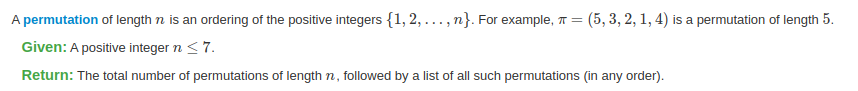

In [29]:
# itertools
def permutations_itertools(l: list) -> list[tuple]:
    return list(itertools.permutations(l))

# recursive solution
def permutations_recursive(l: list) -> list[list]:
    return [ 
        (m[:i] + [l[0]] + m[i:]) for m in permutations_recursive(l[1:]) for i in range(len(m)+1) 
    ] if (len(l)>1) else [l]

# print solution
def print_permutations_solution(func: Callable, n: str) -> str:
    n = int(n)
    l = list(range(1, n+1))
    # permutations = '\n'.join(
    #     [str(len(permutations))] + [' '.join([str(i) for i in p]) for p in permutations]
    # )
    permutations = func(l)
    print(len(permutations))
    for p in func(l):
        print(' '.join((str(i) for i in p)))

test_input = list(range(1, 4))
test_output = [(1, 2, 3), (1, 3, 2), (2, 1, 3), (2, 3, 1), (3, 1, 2), (3, 2, 1)]

print(set(permutations_itertools(test_input)) == set(test_output))

True


Average execution time of *permutations_itertools* over 1000 calls: 0.001246 seconds  
Average execution time of *permutations_recursive* over 1000 calls: 0.00809 seconds

## Locating Restriction Sites

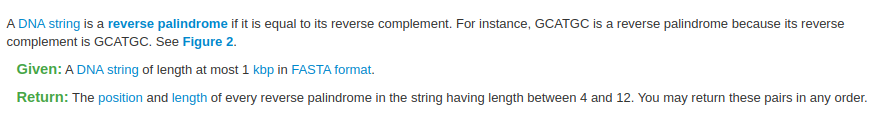

In [30]:
def find_reverse_palindrome(filename: str) -> str:
    with open(filename) as f:
        next(f)
        dna_5_3 = f.read().replace('\n', '')
    dna_len = len(dna_5_3)
    dna_3_5 = dna_5_3.translate(str.maketrans('ACGT', 'TGCA'))

    palindromes = []
    length = 12
    for i in range(dna_len-3):
        while (length >= 4):
            s1 = dna_5_3[i:i+length]
            s2 = dna_3_5[i:i+length][::-1]
            if s1 == s2:
                palindromes.append(f'{i+1} {length}')
                break
            length -= 1
        length = 12 if (dna_len-i > 12) else (dna_len-i-1)
    return '\n'.join(palindromes)

test_input = """>Rosalind_24
TCAATGCATGCGGGTCTATATGCATCGCG"""
test_output = """4 6
5 4
6 6
7 4
17 4
18 4
20 6
21 4
26 4"""

test_solution(find_reverse_palindrome, test_input, test_output)

Test passed!


## Enumerating k-mers Lexicographically

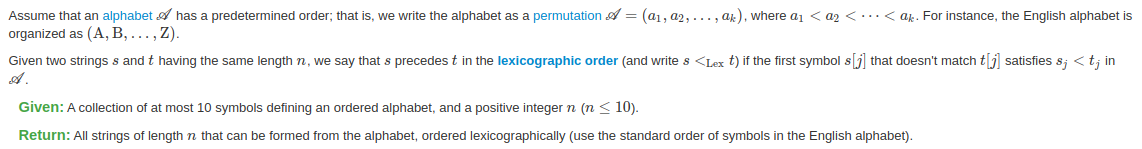

In [55]:
def enumerate_k_mers(filename: str) -> str:
    with open(filename) as f:
        symbols = f.readline().strip().split(' ')
        k = int(f.readline().strip())
    return '\n'.join([''.join(i) for i in itertools.product(symbols, repeat=k)])

test_input = """A C G T
2"""
test_output = """AA
AC
AG
AT
CA
CC
CG
CT
GA
GC
GG
GT
TA
TC
TG
TT"""

test_solution(enumerate_k_mers, test_input, test_output)

Test passed!
